# Marvel Superheroes - Group 14

## Group Members
* Simone Facchiano
* Stefano Lacommare
* Jonas Barth

# Index

* [Graph Setup](#Graph-Setup)
    * [Collaborative Graph](#Collaborative-Graph)
    * [Hero-Comic Graph](#Hero-Comic-Graph)
* [Hero Graph Features](#hero-graph-features)
    * [Functionality](#1.-Functionality)
    * [Visualisation](#1.-Visualisation)
* [Find Top Superheroes](#Find-Top-Superheroes)
    * [Functionality](#2.-Functionality)
    * [Visualisation](#2.-Visualisation)
* [Shortest Ordered Route](#shortest-ordered-route)
    * [Functionality](#3-Functionality)
    * [Visualisation](#3-Visualisation)
* [Disconnecting Graphs](#disconnecting-graphs)
    * [Functionality](#4.-Functionality)
    * [Visualisation](#4.-Visualisation)
* [Exctracting Communities](#Extracting-Communities)
    * [Functionality](#5.-Functionality)
    * [Visualisation](#5.-Visualisation)

Turn off the logging messages in the notebook

In [2]:
import logging, sys
logging.disable(sys.maxsize)

Use `itables` to make displayed pandas dataframes interactive. 

In [1]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

# Graph Setup
The graphs are created in the [backend/graph](backend/graph) package. Within this package, there are **two** modules:
- [collaborative](backend/graph/collaborative.py) for creating graphs where heroes are linked to heroes (first graph).
- [hero-comic](backend/graph/hero_comic.py) for creating graphs where heroes are linked to comics (second graph).

Graphs are easily created using the `create_from` function, which can create `networkx` graphs from `.csv` files or `pandas` dataframes. The function returns a tuple of the created graph and its graph type, **collaborative** or **hero-comic**. The function also applies a number of preprocessing steps to the provided data.

## Collaborative Graph

### Preprocessing
The `create_from` function for the collaborative graph applies the following preprocessing steps:

1. remove self loops from the data.
1. strip trailing whitespace and `/` from heroes, e.g. `IRONMAN/TONY STARK/` becomes `IRONMAN/TONY STARK`.
1. replace `SPIDER-MAN/PETER PAR` with `SPIDER-MAN/PETER PARKER`.

### Weight
The collaborative graph is a **weighted** graph, where the weight between the heroes is relative to the **number of collaborations** between them. We have a [weight](backend/graph/weight.py) module with several functions that calculate weights for the edges. The one we chose, will normalise weights into $[0, 1]$ where numbers close to $0$ represent more collaborations between the two heroes that share the edge. 

The equation shows the limit of the weight function that we use. As the number of collaborations $n$ grows to infinity, the weight function will go to $0$ as we subtract the proportion of $n$ over the maximum number of collaborations $max(N)$, where $N$ is the set of all numbers of collaborations.
$$\lim_{n\to\infty} 1 - \frac{n}{max(N) + 1} = 0$$

### Other attributes
In addition to the weight, each edge also has an attribute that specifies the number of collaborations that the two heroes have.

---

We create the graph from the `hero-network.csv` file.

In [3]:
import backend.graph.collaborative as collaborative
import backend.graph.weight as weight

collab_graph, collab_graph_type = collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/hero-network.csv', weight=weight.max_prop)

## Hero-Comic Graph
The `create_from` function for the hero-comic graph applies the following preprocessing steps:

1. strip trailing whitespace and / from heroes
1. replace `SPIDER-MAN/PETER PARKERKER` with `SPIDER-MAN/PETER PARKER`.

The returned graph is a `networkx` graph object with heroes linked to comics. We create the graph from the `nodes.csv` and `edges.csv` files.

In [4]:
import backend.graph.hero_comic as hero_comic

hero_comic_graph, hero_comic_graph_type = hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')    

# Controller
We create **one** controller **per graph**. The [controller class](backend/controller.py) has a `run` method that receives:
- names of functionalities
- `top_n` for the top N heroes to consider
- a number of keyword arguments that depend on the functionality. 

The `run` method runs the functionality on the graph that is assigned to the class and returns the result.

In [5]:
from backend import Controller

collab_controller = Controller(collab_graph)
hero_comic_controller = Controller(hero_comic_graph)

# Features

## 1. Functionality
The `features` method will return a [GraphFeatures](backend/describe/graph) instance that contains:
- the graph type of the graph.
- the number of nodes in the graph.
- a set of hero collaboration.
- a list of Comic classes that with information about the number of heroes inside them.
- the density of the graph.
- the distribution of degrees across the graph.
- the average degree in the graph.
- a set of hubs in the graph.
- the mode of the graph, whether it is sparse or dense.

We run the method for the **top 25** heroes.

In [ ]:
collab_features = collab_controller.run('features', top_n=25, graph_type=collab_graph_type)
hero_comic_features = hero_comic_controller.run('features', top_n=25, graph_type=hero_comic_graph_type)

## 1. Visualisation
The `visualise_features` function takes in a [GraphFeatures](backend/describe/graph.py) object and prints out its contents. When visualising the features of the graph for the **top 25 nodes**, we see that it is a **complete graph** from the fact that:

* the density is the maximum, i.e. 1.0
* the average degree is 24, meaning that every hero is connected to all heroes in the graph.

This also means that the **hubs** of the graph are **all** nodes in the graph, and that the degree distribution is **discrete uniform**.


SOME BASIC FEATURE:

-->  This network has 25 nodes.
-->  The density of the network is 1.0
-->  Since the density is 1.0, we say that the network is DENSE.
-->  The average degree in the network is 24.0 nodes.

**************************************************

SOME INFO ABOUT THE HUBS:

-->  The Hubs of the network are the following:


hub  degree
0       WATSON-PARKER, MARY      24
1                    VISION      24
2      CYCLOPS/SCOTT SUMMER      24
3                      HAWK      24
4           WOLVERINE/LOGAN      24
5       INVISIBLE WOMAN/SUE      24
6       FURY, COL. NICHOLAS      24
7           CAPTAIN AMERICA      24
8         JAMESON, J. JONAH      24
9       PROFESSOR X/CHARLES      24
10     MR. FANTASTIC/REED R      24
11     THING/BENJAMIN J. GR      24
12      DR. STRANGE/STEPHEN      24
13     SUB-MARINER/NAMOR MA      24
14     STORM/ORORO MUNROE S      24
15      IRON MAN/TONY STARK      24
16      SCARLET WITCH/WANDA      24
17     ANT-MAN/DR. HENRY J.      24
18      WASP/JANET VAN DYNE      24
19     THOR/DR. DONALD BLAK      24
20     DAREDEVIL/MATT MURDO      24
21  SPIDER-MAN/PETER PARKER      24
22     BEAST/HENRY &HANK& P      24
23     HULK/DR. ROBERT BRUC      24
24     HUMAN TORCH/JOHNNY S      24


**********************************************************************

SOME INFO ABOUT THE COLLABORATION OF EACH HERO:



hero_1                hero_2  n_collabs
0     WATSON-PARKER, MARY   IRON MAN/TONY STARK          9
1     WATSON-PARKER, MARY  HULK/DR. ROBERT BRUC          6
2     WATSON-PARKER, MARY                VISION          4
3     WATSON-PARKER, MARY  ANT-MAN/DR. HENRY J.          3
4     WATSON-PARKER, MARY  HUMAN TORCH/JOHNNY S         15
..                    ...                   ...        ...
595  HUMAN TORCH/JOHNNY S   FURY, COL. NICHOLAS         31
596  HUMAN TORCH/JOHNNY S       WOLVERINE/LOGAN         67
597  HUMAN TORCH/JOHNNY S  STORM/ORORO MUNROE S         60
598  HUMAN TORCH/JOHNNY S   PROFESSOR X/CHARLES         60
599  HUMAN TORCH/JOHNNY S   WATSON-PARKER, MARY         15

[600 rows x 3 columns]


**********************************************************************

THE DEGREE DISTRIBUTION:


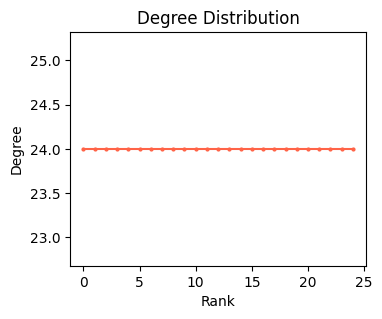

In [7]:
from frontend import visualise_features

visualise_features(collab_features)

# Find Top Superheroes

## 2. Functionality

This function takes in input a graph, a specific node, the metric we want to use and the number of top heros we want to analyze. The function will return the metric values for the top N heros and in particular for the selected node. The metrics that you can choose are betweenness centrality, pagerank, closeness centrality and degree centrality.

In [ ]:
metric = 'betweenness_centrality'
graph_metrics, node_metrics = collab_controller.run('metrics', top_n=50, node='WOLVERINE/LOGAN', metric=metric)

**Betweenness centrality** is a measure of how often a node acts as a bridge along the shortest path between two other nodes. A high betweenness centrality value suggests that the node is influential in connecting other nodes in the graph instead, if it's low, it may mean that the user is less connected to other nodes in the network. <br>
A node with a high **PageRank** score is considered more important than a node with a low score and it may mean that they are influential within the network and are frequently linked to by other nodes. <br>
A node with a high **closeness centrality** is able to reach other nodes in the graph more quickly than a node with a low closeness centrality so it may mean that they are well-connected to other nodes and have a central role within the network. <br>
**Degree centrality** is a measure of how many other nodes a node is connected to so a node with a high degree centrality means that is well-connected within the network and has many connections to other nodes. <br>
For example an high PageRank value and, at the same time, a low betweenness centrality, may mean that it's an important hero within the Marvel universe, but may not play as significant a role in connecting other heroes or groups within the network.

## 2. Visualisation
In the table below, we see the average betweenness centrality for the top 50 heroes and for WOLVERINE/LOGAN. The value is higher for WOLVERINE/LOGAN.

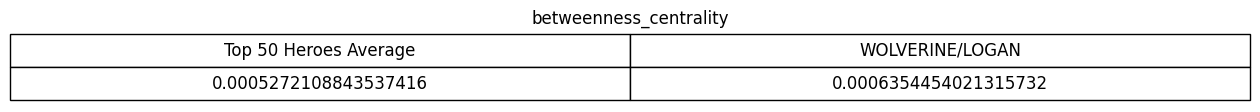

In [9]:
from frontend import visualise_metrics

visualise_metrics(graph_metrics=graph_metrics, node_metrics=node_metrics, metric=metric)

# 3. Shortest ordered route

## Functionality

We want to find the minimum path between two heroes in terms of comics, with the constraint that we must visit, in order, other intermediate nodes. <br>

To implement this algorithm, we split the problem into smaller problems, searching for the minimum path between Node_0 and Node_1, then between Node_1 and Node_2, and so on, until we reach Node_n. <br>
This algorithm fails only in the case where the graph is disconnected, in which case it reports an error. <br>

In the visualization part, we report the information we are interested in. Specifically, we print on the screen the comic books that we will have to read if we want to meet our heroes in the given order, and then we plot a graph containing the hero-comic book connections in question. <br>

In [19]:
shortest_path = hero_comic_controller.run('shortest_order_route', top_n=42, initial_hero = 'SPIDER-MAN/PETER PARKER', final_hero = 'CYCLOPS/SCOTT SUMMER', superheroes = ["BLACK WIDOW/NATASHA",'CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'HULK/DR. ROBERT BRUC'], hero_comic =  '/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')

## 3. Visualisation

The shortest path in terms of comics is: ['A 221', 'A 111', 'A 118', 'A 118', 'A 3']

***************************************************************************



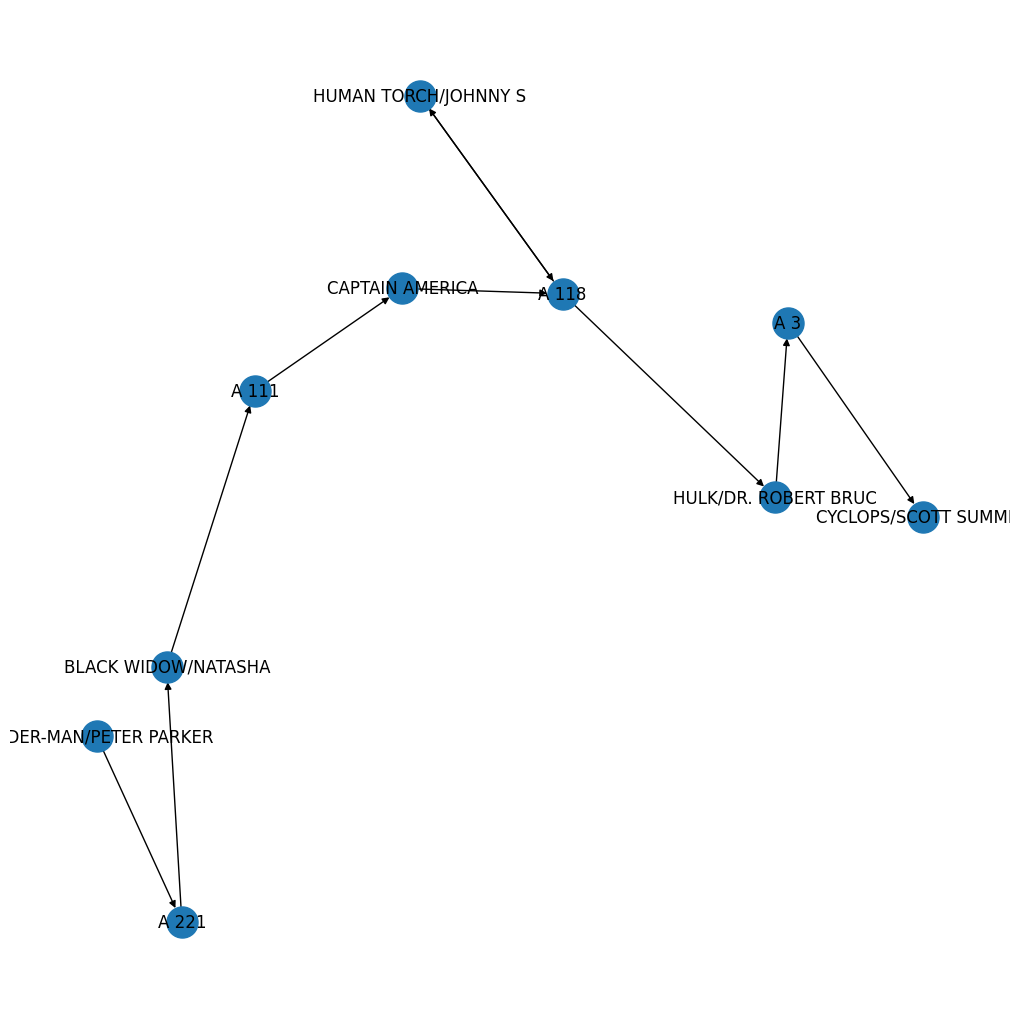

<Figure size 600x600 with 0 Axes>

In [20]:
from frontend import visualize_shortest_path

visualize_shortest_path(shortest_path)

# Disconnecting Graph

## 4. Functionality
We run the `disconnected_graphs` functionality with the two heroes **SPIDER-MAN/PETER PARKER** and **WOLVERINE/LOGAN**, for the **top 25** heroes. The functionality returns a [Disconnection](backend/domain/disconnection.py) object object that contains:
* the edges that were disconnected
* the cumulative weight of the disconnected edges
* the original graph
* the hero_a
* the hero_b 
* the graph_a that contains hero_a
* the graph_b that contains hero_b

In [10]:
hero_a = 'SPIDER-MAN/PETER PARKER'
hero_b = 'WOLVERINE/LOGAN'

disconnection = collab_controller.run('disconnecting_graphs', top_n=25, hero_a=hero_a, hero_b=hero_b)

## 4. Visualisation

The `disconnected_graph` function from our `frontend` package uses the `disconnection` object to create two `pyvis` graphs and save them as `.html` files. We can then load these files and display them with the help of an `IPython IFrame`.

### Interactivity
You can drag the entire graph or individual nodes with your mouse. Scrolling down the `IFrame` you will find some options that let you set aspects of the graph, e.g. the **label size** of the nodes.

In [11]:
from frontend import visualise_disconnected_graph

message, original_graph_path, disconnected_graph_path = visualise_disconnected_graph(disconnection)

### Number of Links 
Since the graph of the **top 25** is a **complete** graph, we will need to remove **24** edges from the graph to disconnect the original graph.

In [12]:
print(message)

The number of edges that were removed from the original graph is: 24


### The Original Graph
In the **interactive** graph shown below, we can see that the original graph with the **top 25 heroes** is a **complete** graph. The two heroes *SPIDER-MAN/PETER PARKER* and *WOLVERINE/LOGAN* are coloured **red**.

**NOTE:** If you **cannot** see the hero names, scroll down the `IFrame` and change the **font size**.

In [13]:
from IPython.display import IFrame

IFrame(src=original_graph_path, width=1000, height=600)

### The Disconnected Graph

Because the original graph with the **top 25 heroes** is a **complete** graph (density is equal to 1), when disconnecting them we will end up with a **complete graph** with **24 heroes** and a graph with **only a single** node.

In [14]:
import networkx as nx
nx.density(disconnection.original_graph)

1.0

In [26]:
from IPython.display import IFrame

IFrame(src=disconnected_graph_path, width=1000, height=600)

# Extracting Communities

## 5. Functionality
We run the `extract_communities` function for the **top 25** heroes with *CAPTAIN AMERICA* as `hero1` and *IRON MAN/TONY STARK* as `hero2`.

The `extract_communities` function returns a [Communities](backend/domain/communities.py) dataclass containing:
* the edges that were disconnected
* the original graph
* the hero_1
* the hero_2 
* the community_1 that contains hero_1
* the community_2 that contains hero_2
* whether the two heroes are in the same community

In [28]:
hero_1 = 'CAPTAIN AMERICA'
hero_2 = 'IRON MAN/TONY STARK'
comms = collab_controller.run('extract_communities', top_n=25, hero_1=hero_1, hero_2=hero_2)

## 5. Visualisation

The `visualise_communities` function from the [frontend](frontend) package generates the visualisation outputs for the extracted communities object. It returns:
* a message about the number of removed links
* a table with the two communities
* a path to the original graph
* a path to a graph with the two communities coloured in
* a path to a graph with the communities of the heroes coloured in

Again, the graphs are `.html` files that are generated with the `pyvis` package.

In [17]:
%%capture
from frontend import visualise_communities

message, table, comms_original_graph_path, communities_graph_path, comms_final_graph_path = visualise_communities(comms)

### Links Removed
Like with the [disconnected graphs](#Disconnected-Graph), since we have a complete graph, the best way to split it is to remove **24** edges.

In [18]:
print(message)

The number of links that should be removed to have two communities is: 24.


### Communities Table
The table below shows the two generated communities with their heroes. As in [Disconnecting Graph](#Disconnecting-Graph), the split is as **uneven** as it possibly can be, with **one hero** in Community 1 and **the rest** in Community 2. We also observe that the two chosen heroes: **CAPTAIN AMERICA** and **IRON MAN/TONY STARK** ended up in the same community.

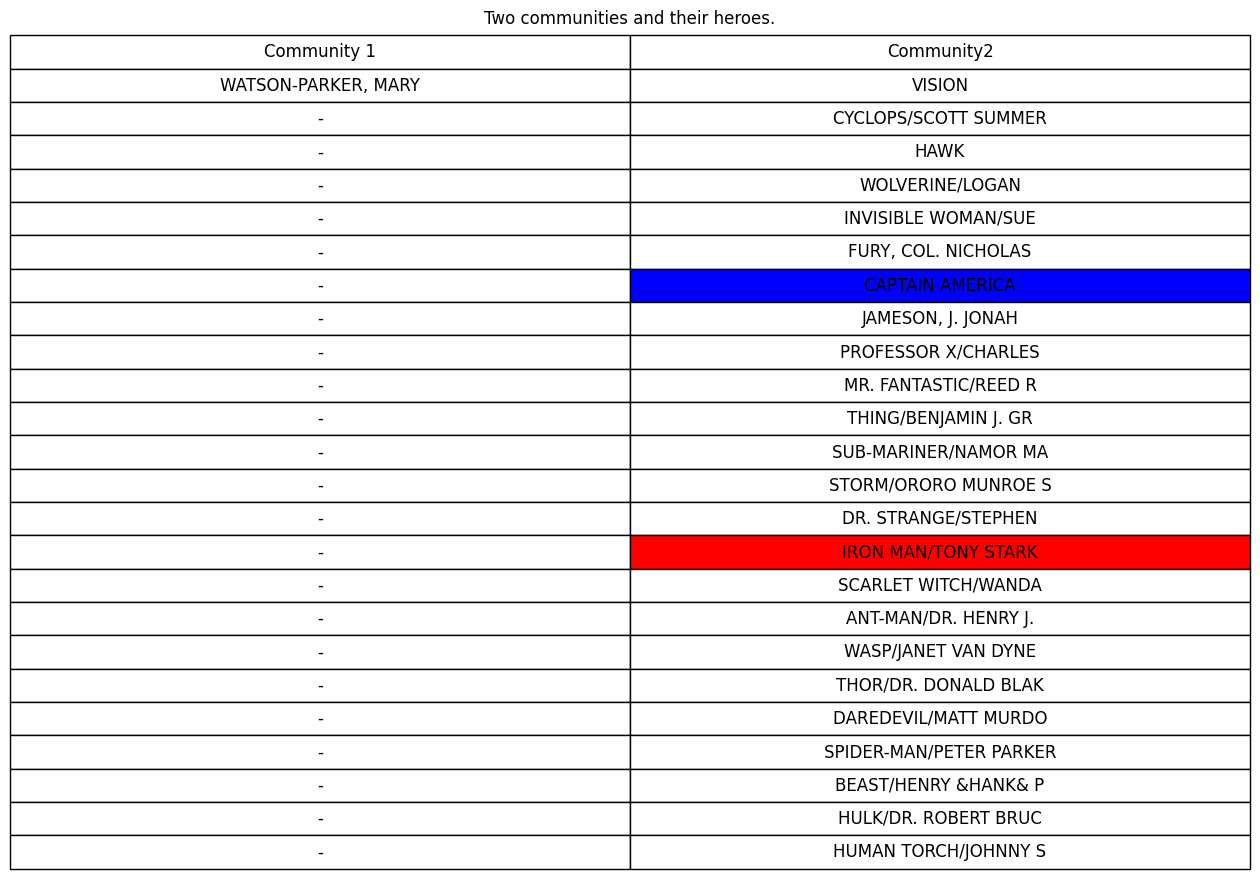

In [19]:
table

### Original Graph
The graph below is the original graph of the **top 25** heroes. Again, when scrolling down the frame, there are some settings that can be adjusted, e.g. font size.

In [20]:
IFrame(src=comms_original_graph_path, width=1000, height=600)

### Communities Graph
The graph below shows the two communities: **Community 1 (red)** and **Community 2 (blue)**. It shows what the communities table already showed, namely the fact that the two communities are **extremely imbalanced** due to the fact that the graph is so **densely connected**.

In [21]:
IFrame(src=communities_graph_path, width=1000, height=600)

### Final Graph
The last graph shows the actual communities that hero 1 and hero 2 belong to. The graph can take the following colours:

* green - the community that contains **both hero 1 and hero 2**.
* blue - the community that contains **hero 1 ONLY** (not present in this graph because both heroes are in the same community)
* red - the community that contains **hero 2 ONLY** (not present in this graph because both heroes are in the same community)
* yellow - the community that contains **neither hero 1 nor hero 2**.

In [22]:
IFrame(src=comms_final_graph_path, width=1000, height=600)